In [116]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("data/bs.csv")
#df = df[~df.category.isin(["'es_transportation'", "'es_food'", "'es_contents'"])]
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


<AxesSubplot:xlabel='amount', ylabel='Count'>

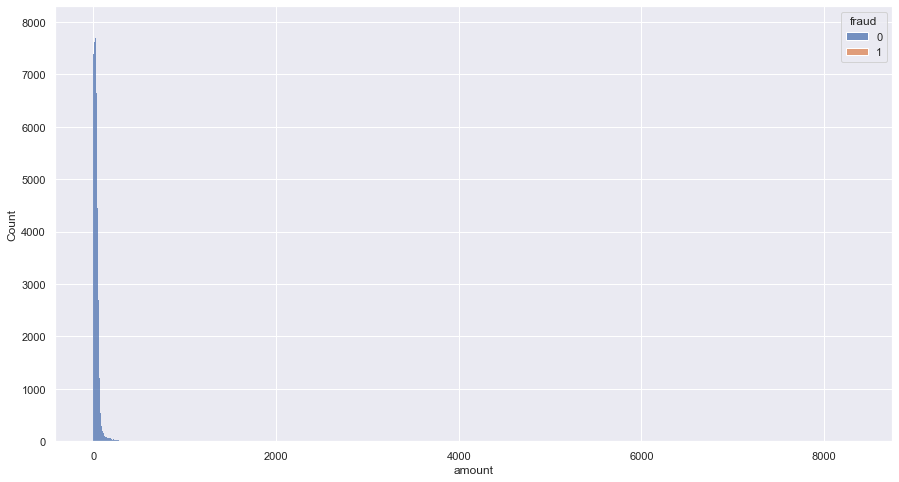

In [75]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=df, x="amount", hue="fraud", multiple="stack")

<AxesSubplot:xlabel='step', ylabel='Count'>

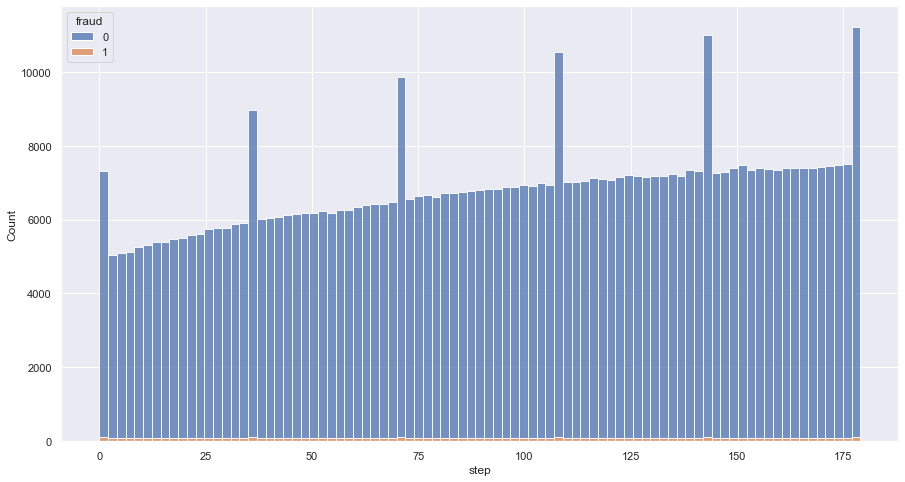

In [76]:
# frequency count of field by fraud
sns.histplot(data=df, x="step", hue="fraud", multiple="stack")


<AxesSubplot:xlabel='step', ylabel='amount'>

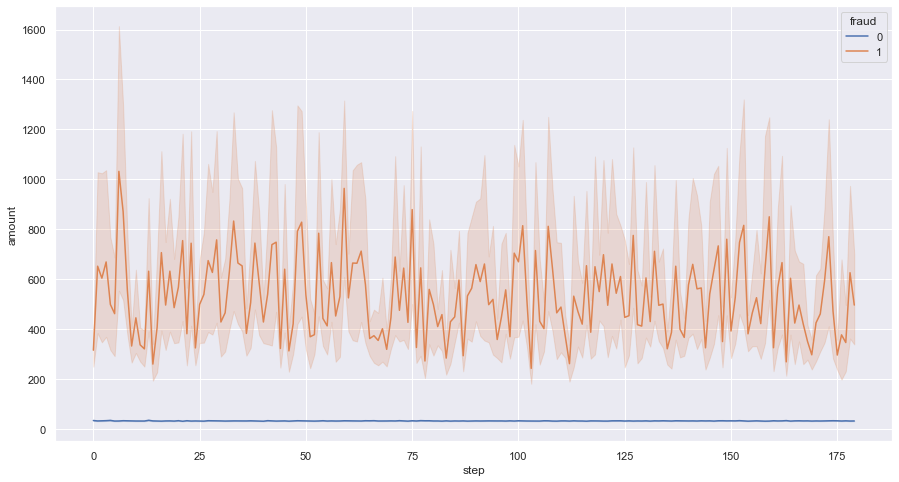

In [89]:
# mean transaction amount by field by fraud
# the lines are error bars representing the uncertainty around the mean estimate
sns.lineplot(data=df, x="step", y="amount", hue="fraud")
#plt.xticks(rotation = 45)


<AxesSubplot:xlabel='age', ylabel='Count'>

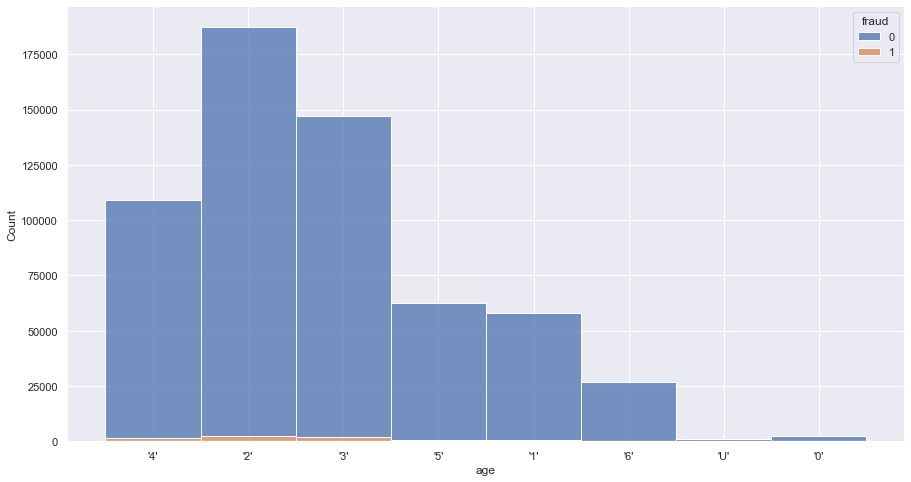

In [78]:
sns.histplot(data=df, x="age", hue="fraud", multiple="stack")

<AxesSubplot:xlabel='age', ylabel='amount'>

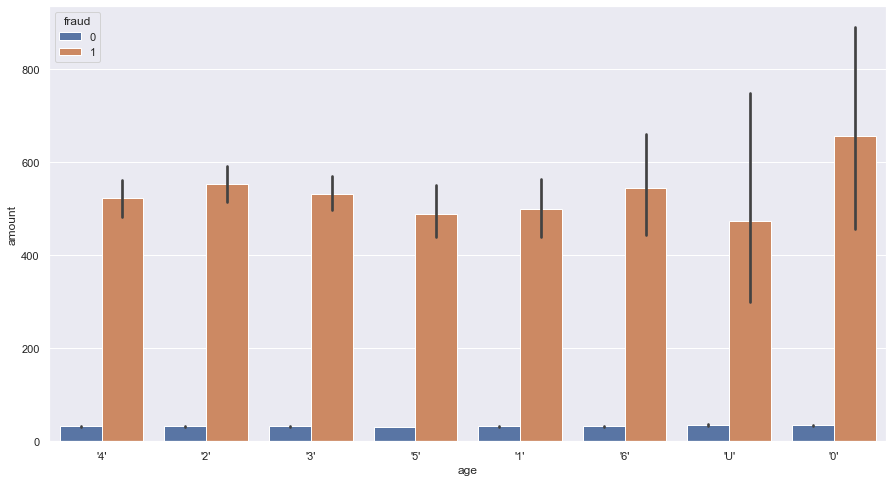

In [79]:
sns.barplot(data=df, x="age", y="amount", hue="fraud")

<AxesSubplot:xlabel='gender', ylabel='Count'>

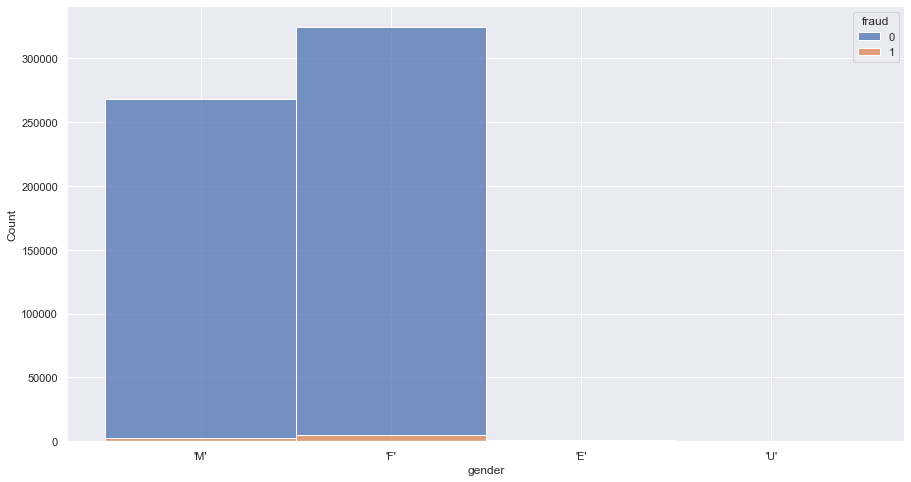

In [80]:
sns.histplot(data=df, x="gender", hue="fraud", multiple="stack")

<AxesSubplot:xlabel='gender', ylabel='amount'>

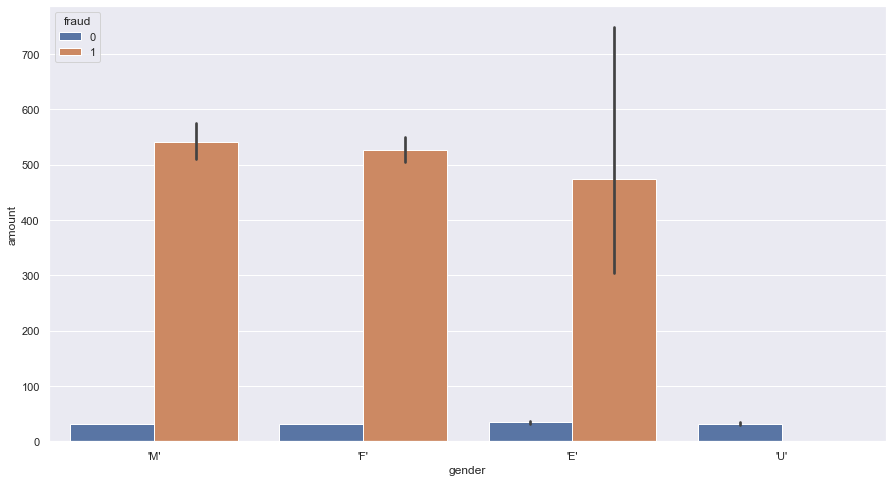

In [81]:
sns.barplot(data=df, x="gender", y="amount", hue="fraud")

<AxesSubplot:xlabel='Count', ylabel='category'>

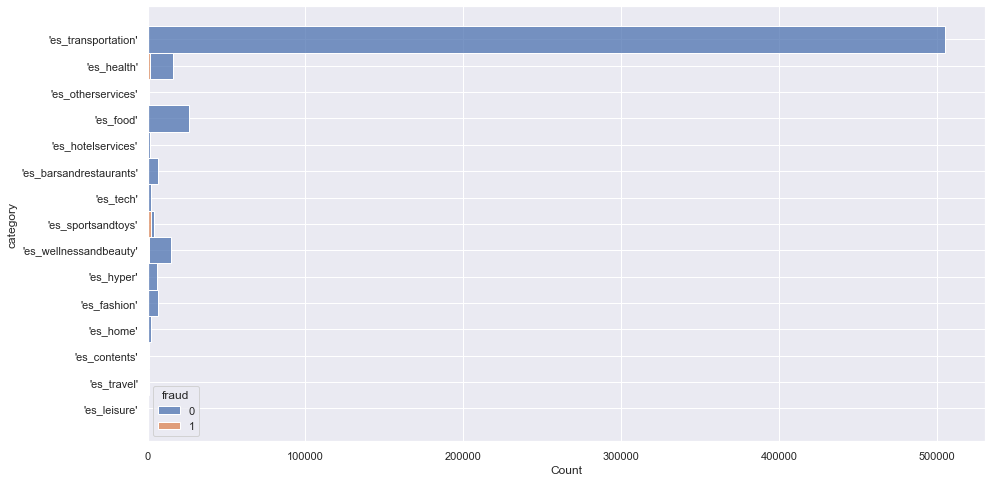

In [84]:
sns.histplot(data=df, y="category", hue="fraud", multiple="stack")

<AxesSubplot:xlabel='amount', ylabel='category'>

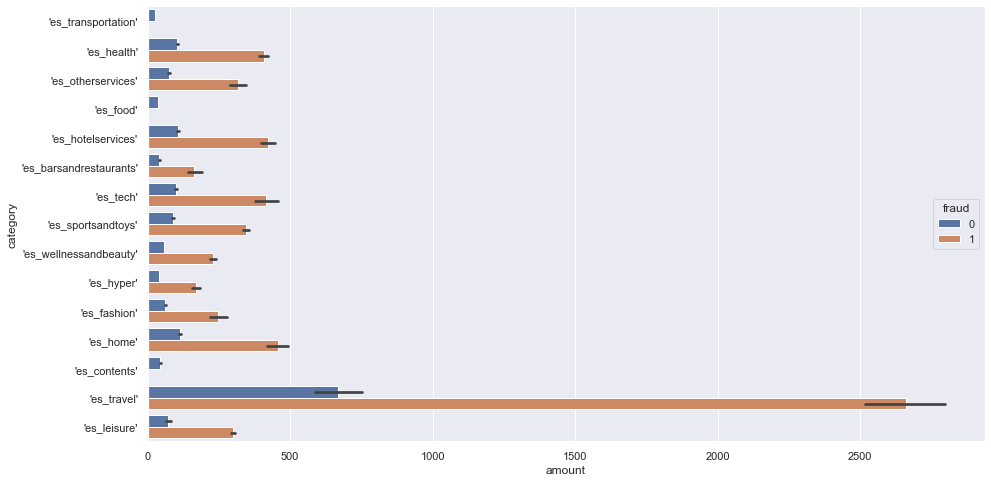

In [85]:
sns.barplot(data=df, y="category", x="amount", hue="fraud")

In [ ]:
# sk.preprocessing.OneHotEncoder(categories='auto')
# categorical = ['age', 'gender', 'category']
# for cat in categorical:

In [86]:
customer = {}
merchant = {}

for index, row in df.iterrows():
    #populating customer table
    if row.customer not in customer:
        customer[row.customer] = {}
        customer[row.customer]["purchases"] = []
        customer[row.customer]["stolen"] = []
        if row.fraud == 0:
            customer[row.customer]["transactions"] = 1
            customer[row.customer]["frauds"] = 0
            customer[row.customer]["purchases"].append(row.amount)
        elif row.fraud == 1:
            customer[row.customer]["transactions"] = 0
            customer[row.customer]["frauds"] = 1
            customer[row.customer]["stolen"].append(row.amount)   
    else:
        if row.fraud == 0:
            customer[row.customer]["transactions"] += 1
            customer[row.customer]["purchases"].append(row.amount)
        elif row.fraud == 1:
            customer[row.customer]["frauds"] += 1
            customer[row.customer]["stolen"].append(row.amount)
        
    #populating the merchant table    
    if row.merchant not in merchant:
        merchant[row.merchant] = {}
        merchant[row.merchant]["sales"] = []
        merchant[row.merchant]["stolen"] = []
        if row.fraud == 0:
            merchant[row.merchant]["transactions"] = 1
            merchant[row.merchant]["frauds"] = 0
            merchant[row.merchant]["sales"].append(row.amount)
        elif row.fraud == 1:
            merchant[row.merchant]["transactions"] = 0
            merchant[row.merchant]["frauds"] = 1
            merchant[row.merchant]["stolen"].append(row.amount)
    else:
        if row.fraud == 0:
            merchant[row.merchant]["transactions"] += 1
            merchant[row.merchant]["sales"].append(row.amount)
        elif row.fraud == 1:
            merchant[row.merchant]["frauds"] += 1
            merchant[row.merchant]["stolen"].append(row.amount)
        

In [91]:
# how many individual customers and merchants
len(customer)
len(merchant)

4112

50

In [125]:
c_df = pd.DataFrame.from_dict(customer, orient='index', columns=['purchases', 'stolen', 'transactions', 'frauds'])
len(c_df[c_df.frauds > 0])

1483

In [124]:
Pavg = []
for index, row in c_df.iterrows():
    Pavg.append(sum(row["purchases"]) / row["transactions"])
c_df["avg_purchase"] = Pavg

Tavg = []
for index, row in c_df.iterrows():
    if row.frauds > 0:
        Tavg.append(sum(row["stolen"]) / row["frauds"])
    else:
        Tavg.append(0)
c_df["avg_theft"] = Tavg

c_df[c_df.avg_theft > 0].head()

,purchases,stolen,transactions,frauds,avg_purchase,avg_theft
'C765155274',"[9.1, 14.39, 18.96, 36.39, 23.22, 8.41, 10.7, ...",[752.23],175,1,39.201143,752.230
'C623601481',"[68.79, 58.38, 78.92, 2.78, 14.92, 31.77, 45.1...","[431.88, 2372.22, 521.63, 1888.43, 541.61]",89,5,28.985955,1151.154
'C194016923',"[30.19, 31.45, 8.54, 5.15, 24.48, 32.2, 10.8, ...","[164.04, 1142.23]",158,2,29.775127,653.135
'C834963773',"[40.69, 4.93, 20.86, 37.22, 20.19, 11.84, 51.6...","[747.24, 667.76, 437.47, 96.59, 244.63]",178,5,33.194944,438.738
'C124539163',"[10.09, 21.87, 20.25, 14.75, 29.59, 17.67, 55....","[4574.72, 85.87]",75,2,32.948533,2330.295


In [126]:
m_df = pd.DataFrame.from_dict(merchant, orient='index', columns=['sales', 'stolen', 'transactions', 'frauds'])
len(m_df[m_df.frauds > 0])


30

In [128]:
Savg = []
for index, row in m_df.iterrows():
    Savg.append(sum(row["sales"]) / row["transactions"])
m_df["avg_sale"] = Savg

Favg = []
for index, row in m_df.iterrows():
    if row.frauds > 0:
        Favg.append(sum(row["stolen"]) / row["frauds"])
    else:
        Favg.append(0)
m_df["avg_theft"] = Favg

m_df[m_df.avg_theft > 0].head()

,sales,stolen,transactions,frauds,avg_sale,avg_theft
'M50039827',"[68.79, 59.51, 98.24, 163.03, 115.87, 20.7, 10...","[1025.56, 295.57, 493.79, 520.11, 130.56, 590....",870,46,105.229092,409.394130
'M1888755466',"[87.67, 25.0, 84.39, 24.29, 19.25, 116.01, 96....","[66.6, 189.22, 41.48, 572.01, 386.21, 226.78, ...",684,228,75.685497,316.469605
'M480139044',"[266.59, 44.14, 248.42, 55.82, 50.88, 83.93, 2...","[44.26, 324.5, 667.09, 520.5, 289.21, 560.9, 9...",1874,1634,103.299803,406.857032
'M692898500',"[171.07, 109.26, 187.62, 237.48, 195.44, 27.84...","[112.55, 830.57, 143.09, 607.85, 904.51, 411.0...",884,16,105.148835,418.039375
'M348875670',"[114.54, 127.84, 199.95, 35.57, 134.89, 154.92...","[112.44, 321.46, 145.84, 0.8, 141.22, 420.81, ...",97,10,111.385361,211.485000


In [158]:
exploited = df[["merchant", "category"]][df.merchant.isin(m_df[m_df.frauds > m_df.transactions].index)]
exploited.groupby(["merchant"])["category"].unique()

merchant
'M1294758098'          ['es_leisure']
'M1353266412'    ['es_hotelservices']
'M17379832'      ['es_sportsandtoys']
'M1873032707'    ['es_hotelservices']
'M2011752106'    ['es_hotelservices']
'M2080407379'           ['es_travel']
'M2122776122'             ['es_home']
'M3697346'             ['es_leisure']
'M732195782'            ['es_travel']
'M857378720'     ['es_hotelservices']
'M980657600'     ['es_sportsandtoys']
Name: category, dtype: object